# **Unit 1 Assignment: Topics 1-3**

## *DATA 5420/6420*
## Name: Patrick Neyland

For this first assignment I want you to spend some time thinking about a dataset you might want to work with throughout the semester to build something cool! This could be a personal project, something you build for someone else, or maybe even the start of a business -- get creative!

Once you have selected your dataset or data source, I want you to apply the skills you've learned from Unit 1 (topics 1-3), including finding and loading a data source, describing and understanding your text data, and then cleaning/preprocessing your data to prep it for feature engineering!

We of course aren't ready to begin critically analyzing your text yet, but use this as an opportunity to explore different sources of text, consider what you'd be interested in building something around, and start jogging ideas of how you'd like to see this project progress throughout the semester.

**If you are in the 5420 (undergraduate) section of this course**, you may choose a dataset that has been precompiled from a source like [Kaggle](https://www.kaggle.com/datasets?tags=13204-NLP), though you are not constrained to this source!

**If you are in the 6420 (graduate) section of this course**, I'd like you to source your text data from an API or scraping, or if you have data from work/another personal project, that's fine too.

**If you use ChatGPT or other LLMs (which I highly encourage) -- share your prompts in the template -- I'd love to see your approach!**


> *Throughout this assignment I will ask you to provide comments in your code that indicate what each step/line is doing. This is a great habit to get into to not only make sure you know what's going on as you're learning new code, but to also ensure that anyone else who might access your code in the future can read it and understand your process! You will be docked points if you fail to include this documentation!*

## **Import Dependencies \& Packages**

In [35]:
# import required libraries and packages
import PyPDF2
import nltk
import re

# Download NLTK resources (tokenizers, stopwords, etc.)
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import nltk, re, pprint

from urllib import request
from bs4 import BeautifulSoup                                                                                   # needed for parsing HTML

import contractions                                                                                             # contractions dictionary
from string import punctuation

#import spacy                                                                                                    # used for lemmatization/stemming
#python -m spacy download en_core_web_sm                # OR in Jupyter download in terminal using spacy download en_core_web_sm

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
tokenizer = ToktokTokenizer()                                                                                   # stopword removal
from nltk import word_tokenize

import pandas as pd
import numpy as np        

## **Part 1: Selecting \& Importing a Data Source**

Remember, if you are in the DATA 6420 section, your data needs to be sourced from either: an API or web-scraping (or if you have data from work/personal project already, that's fine too).

In [37]:
# import data
def extract_text_from_pdf(pdf_file):
    raw = ""
    with open(pdf_file, "rb") as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            raw += page.extract_text()
    return raw

In [38]:
pdf_file_path = r"data\text.pdf"
text = extract_text_from_pdf(pdf_file_path)

#print(text)

*(Add in any LLM prompts/relevant bits of conversations along the way -- share your approach!)*
#### GPT Prompts
* How do I import text data from .pdf files into Python to do some NLP?
* lets just try making a frequency distribution with the top ten most common words
* Can you write a short function to expand contractions and to lemmatize the resulting text? 
* Can you explain to me what is happening in this Python code?  
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in stopword_list]

    cleaned_text = ' '.join(tokens).strip()
* Can you write some code to start exploring my cleaned text dataset?



**What was your motivation for choosing this data set/source?**

I chose this dataset because it is an academic article that could be used for one of my final project ideas. 

**I imagine you're still work-shopping a plan, but what are some interesting things you hope to do with this data going forward in the class?**

I outline this above in my ideas list. 

**Provide or create a description card for this dataset that includes things like:**

* Source of the data : The Accounting Review
* Date of data collection : 9/14/2023
* Genre : Accounting
* Intended use cases : reviewing accoutning research
* Potential sources of bias : This is peer reviewed paper. Only accounting researchers have reviewed it. 
* Anything interesting about the structure or format of the text : An academic paper found in the journal 'The Accounting Review'

## **Part 2: Cleaning \& Preprocessing the Dataset**

As applicable apply any necessary cleaning to your dataset in this next step, thinking things like special character removal, HTML parsing, etc.

In [39]:
print("[", text.find("INTRODUCTION"), ":", text.rfind("REFERENCES"), "]")

[ 1274 : 69544 ]


In [40]:
text = text[1274 : 69544]

In [41]:
nltk.download('stopwords')
tokenizer = ToktokTokenizer()
stopword_list = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
nltk.download('punkt')
def basic_text_cleaner(text):
    # Remove characters that are not letters, whitespaces, or periods
    text = re.sub(r'[^A-za-z0-9\s]', '', text)
    #Lowercase all letters
    #text = text.lower()
    # Tokenize and perform stopword removal, and casefolding
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in stopword_list]

    # Join tokens and trim extra whitespace
    cleaned_text = ' '.join(tokens).strip()

    return cleaned_text

cleaned_text = basic_text_cleaner(text)
print(cleaned_text)

introduction make buy decisions familiar issues accountants often problem cast choice either making buying input make versus buy decision indeed reective circumstances manufacturing rms often opt make buy inputs rms purchase inputs external suppliers relying inhouse production others nd areas specialization outsource theyhave discernable expertise paper examine sourcing circumstances demonstrate informationalreasons result costs made inputs cost outsourced inputs interact particular higher internal makecosts credibly commit rm tough procurement negotiations external supplier turn undercuts suppliers incentive acquire misreport private information would given edge negotiations broadly stated internal production inefciencies come silver lining rm dissuading supplier outsourced inputsfrom gaining information upper hand formally paper models rm sells product requiring two inputs rm makes one input input minternally buys input input bfrom external supplier rm control cost input mby investin

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Describe any cleaning steps you applied to your data**

I used a Regular Expression to get rid of all special characters. 
I tokenize, remove all stopwords and recombine the tokens. 
I will next expand contractions and lemmatize the string I just created. 


**Now let's consider what preprocessing steps may or may not be necessary for your given dataset -- maybe even thinking ahead to what you plan to do with your data later on...**

**Which of the following preprocessing steps will you apply to your data (at least for now)?**



*   Casefolding
*   Contraction Expansion
*   Stopword removal
*   Lemmatization
*   Stemming
*   Other?

**Explain which you choose to apply and why, as well as which you are choosing to not apply and why.**

I am planning on using this data set to build a model that can classify whether a specific document has either right or left political leanings. Therefore, I want as clean of a dataset as possible to build my feature space. Lemmatizing, contraction removal, casefolding, and stopword removal all assist in removing duplicate versions of the same words as well as words that would be irrelevent.

In [43]:
import contractions
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Patri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
def expand_and_lemmatize(text):
    # Expand contractions
    expanded_text = contractions.fix(text)
    
    # Tokenize the expanded text
    tokens = word_tokenize(expanded_text)
    
    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each token and store the results in a list
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the lemmatized tokens and return the cleaned text
    cleaned_text = ' '.join(lemmatized_tokens)
    
    return cleaned_text

In [45]:
clean_lemma_text = expand_and_lemmatize(cleaned_text)

In [46]:
print(clean_lemma_text)

introduction make buy decision familiar issue accountant often problem cast choice either making buying input make versus buy decision indeed reective circumstance manufacturing rms often opt make buy input rms purchase input external supplier relying inhouse production others nd area specialization outsource theyhave discernable expertise paper examine sourcing circumstance demonstrate informationalreasons result cost made input cost outsourced input interact particular higher internal makecosts credibly commit rm tough procurement negotiation external supplier turn undercut supplier incentive acquire misreport private information would given edge negotiation broadly stated internal production inefciencies come silver lining rm dissuading supplier outsourced inputsfrom gaining information upper hand formally paper model rm sell product requiring two input rm make one input input minternally buy input input bfrom external supplier rm control cost input mby investing upfront new technol

## **Part 3: A bit of Text Exploration**

Spend some time exploring your data by looking at text statistics and text visualization (frequency distribution plot or word cloud, etc.)

In [47]:
# text statistics -- e.g. total number of words, total unique words, lexical diversity, top most frequent words, etc.

In [48]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Download NLTK data (if not already downloaded)
nltk.download('punkt')

def text_analysis(cleaned_text):
    # Tokenize the cleaned text
    tokens = word_tokenize(cleaned_text)

    # Calculate the total number of words
    total_words = len(tokens)

    # Calculate the total number of unique words
    unique_words = len(set(tokens))

    # Calculate lexical diversity
    lexical_diversity = unique_words / total_words

    # Create a frequency distribution of words
    freq_dist = FreqDist(tokens)

    # Get the most common words and their frequencies
    most_common_words = freq_dist.most_common(10)  # Change 10 to the desired number of top words

    # Print the results
    print(f"Total number of words: {total_words}")
    print(f"Total unique words: {unique_words}")
    print(f"Lexical diversity: {lexical_diversity:.2f}")
    print("\nTop most frequent words:")
    for word, frequency in most_common_words:
        print(f"{word}: {frequency}")

# Example usage:
text_analysis(clean_lemma_text)

Total number of words: 6090
Total unique words: 1844
Lexical diversity: 0.30

Top most frequent words:
supplier: 254
information: 171
rm: 153
cost: 139
rms: 82
input: 81
investment: 78
contract: 73
informed: 63
1: 44


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


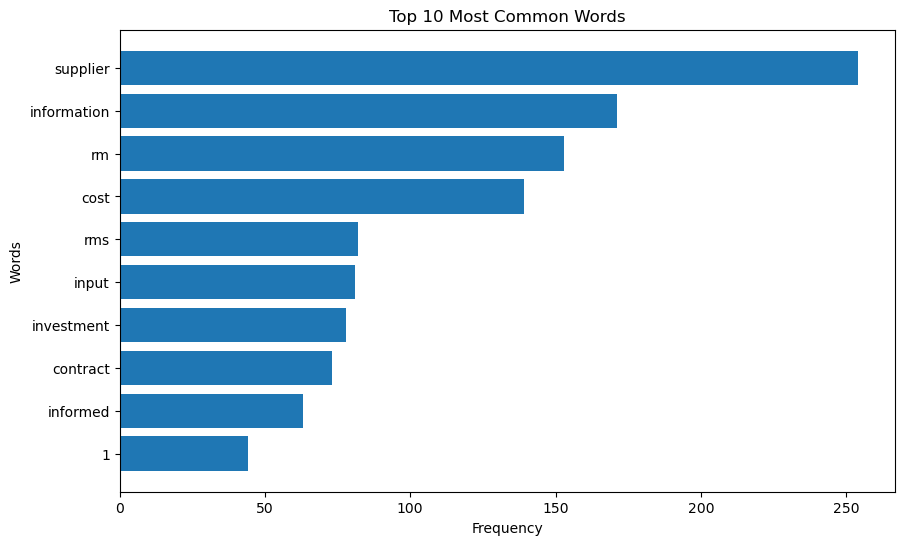

In [49]:
# an interesting or useful text visualization
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Download NLTK data (if not already downloaded)
nltk.download('punkt')

def plot_top_words_frequency(cleaned_text, num_words=10):
    # Tokenize the cleaned text
    tokens = word_tokenize(cleaned_text)

    # Create a frequency distribution of words
    freq_dist = FreqDist(tokens)

    # Get the most common words and their frequencies
    most_common_words = freq_dist.most_common(num_words)

    # Extract words and frequencies
    words, frequencies = zip(*most_common_words)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {num_words} Most Common Words')
    plt.gca().invert_yaxis()  # Invert the y-axis to show the most common words at the top
    plt.show()

# Example usage:
plot_top_words_frequency(clean_lemma_text, num_words=10)

**What insights have you gained through exploring your text with some basic text statistics and visualizations?**

The first insight is a little bit of visual top modeling. I now know that this paper is about business. Likely a research paper about relationships with a business and its suppliers. 

**Are there any changes you'd make to the way you preprocessed your text based on your findings? E.g. a custom stop-word list**

I am looking at the frequency distribution above and I think I would do two things, just based on the top 10 most common words. 1. I would explore why the letter l shows up so much on its own and probably sub in whatever it is abbreviating or just remove it. Then, I would find and expand all instances of the abbreviation rm. In a business context, this may stand for a few different things, so I want to be clear about what this paper is referring to. The goes for rms.

**Now that you've chosen and explored a data set/source, what will your next step be to progress this project? (Not for you to do now, but just thinking ahead).**

Well, I like the preprocessing flow I have in this notebook, but while working on this assignment, it has become clear that I would benefit from selecting a different dataset. I want to define the project as building a model that can classify the political leanings of tax bills for different state legislative sessions. It iwll take some time, but I would like to gather transcripts for state legislative sessions, reduce them to time given to discussion of tax specific bills. Collection of this data is certainly worthwile, but may be too cumbersome to collect for this class. One alternative for training a similar model would be to do the same classification but with reddit posts. I could select five left leaning subreddits and five right leaning subreddits and train a model to classify/predict whether a certain post came from a left or right leaning subreddits. There may not be enough data to do this exclusively with tax related posts, but I think this is a good place to start. 

## **For next class...Be prepared to:**

**Provide a brief (sub 2 minute) stand up to the class to share:**


*   **What you're working on (your dataset source)**
*   **Any road blocks you've run into**
*   **What you plan/hope to do next in your project**

